In [ ]:
!pip install pyspark py4j

In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder.appName("test_pyspark").getOrCreate()

In [ ]:
df = spark.read.csv("/Diwali Sales Data (1).csv",header=True,inferSchema=True)

In [ ]:
df.show()

+-------+---------+----------+------+---------+---+--------------+----------------+--------+---------------+----------------+------+--------+------+--------+
|User_ID|Cust_name|Product_ID|Gender|Age Group|Age|Marital_Status|           State|    Zone|     Occupation|Product_Category|Orders|  Amount|Status|unnamed1|
+-------+---------+----------+------+---------+---+--------------+----------------+--------+---------------+----------------+------+--------+------+--------+
|1002903|Sanskriti| P00125942|     F|    26-35| 28|             0|     Maharashtra| Western|     Healthcare|            Auto|     1| 23952.0|  null|    null|
|1000732|   Kartik| P00110942|     F|    26-35| 35|             1|  Andhra�Pradesh|Southern|           Govt|            Auto|     3| 23934.0|  null|    null|
|1001990|    Bindu| P00118542|     F|    26-35| 35|             1|   Uttar Pradesh| Central|     Automobile|            Auto|     3| 23924.0|  null|    null|
|1001425|   Sudevi| P00237842|     M|     0-17| 16| 

In [ ]:
df.head()

Row(User_ID=1002903, Cust_name='Sanskriti', Product_ID='P00125942', Gender='F', Age Group='26-35', Age=28, Marital_Status=0, State='Maharashtra', Zone='Western', Occupation='Healthcare', Product_Category='Auto', Orders=1, Amount=23952.0, Status=None, unnamed1=None)

In [ ]:
#tail function
total_rows = df.count()
n = 5
df_tail = df.orderBy(df.columns[0], ascending=False).limit(n)
df_tail.show()

+-------+---------+----------+------+---------+---+--------------+--------------+--------+---------------+--------------------+------+-------+------+--------+
|User_ID|Cust_name|Product_ID|Gender|Age Group|Age|Marital_Status|         State|    Zone|     Occupation|    Product_Category|Orders| Amount|Status|unnamed1|
+-------+---------+----------+------+---------+---+--------------+--------------+--------+---------------+--------------------+------+-------+------+--------+
|1006040|     Pond| P00211242|     F|    26-35| 27|             0|         Bihar| Eastern|          Media|     Sports Products|     1|13557.0|  null|    null|
|1006040|     Pond| P00271242|     F|    26-35| 28|             1|         Delhi| Central|      IT Sector|    Footwear & Shoes|     1|20960.0|  null|    null|
|1006040|     Pond| P00111142|     F|    26-35| 27|             0|     Karnataka|Southern|Food Processing|    Footwear & Shoes|     2|20488.0|  null|    null|
|1006040|     Pond| P00271042|     F|    26-35

In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Selecting the columns we want to keep
columns_to_keep = [col for col in df.columns if col not in ['Status', 'unnamed']]
df = df.select(columns_to_keep)
df.show()

+-------+---------+----------+------+---------+---+--------------+----------------+--------+---------------+----------------+------+--------+--------+
|User_ID|Cust_name|Product_ID|Gender|Age Group|Age|Marital_Status|           State|    Zone|     Occupation|Product_Category|Orders|  Amount|unnamed1|
+-------+---------+----------+------+---------+---+--------------+----------------+--------+---------------+----------------+------+--------+--------+
|1002903|Sanskriti| P00125942|     F|    26-35| 28|             0|     Maharashtra| Western|     Healthcare|            Auto|     1| 23952.0|    null|
|1000732|   Kartik| P00110942|     F|    26-35| 35|             1|  Andhra�Pradesh|Southern|           Govt|            Auto|     3| 23934.0|    null|
|1001990|    Bindu| P00118542|     F|    26-35| 35|             1|   Uttar Pradesh| Central|     Automobile|            Auto|     3| 23924.0|    null|
|1001425|   Sudevi| P00237842|     M|     0-17| 16|             0|       Karnataka|Southern|  

In [ ]:
from pyspark.sql.functions import col, sum as pyspark_sum
# Checking for null values in all columns and calculate the sum of nulls per column
null_counts = [pyspark_sum(col(c).isNull().cast("int")).alias(c) for c in df.columns]
null_check_df = df.select(null_counts)

# Showing the DataFrame with null value counts
null_check_df.show()


+-------+---------+----------+------+---------+---+--------------+-----+----+----------+----------------+------+------+--------+
|User_ID|Cust_name|Product_ID|Gender|Age Group|Age|Marital_Status|State|Zone|Occupation|Product_Category|Orders|Amount|unnamed1|
+-------+---------+----------+------+---------+---+--------------+-----+----+----------+----------------+------+------+--------+
|      0|        0|         0|     0|        0|  0|             0|    0|   0|         0|               0|     0|    12|   11251|
+-------+---------+----------+------+---------+---+--------------+-----+----+----------+----------------+------+------+--------+



In [ ]:
# Dropping rows with any null values in any column
df.dropna()
df.count()

11251

In [ ]:
df.show()

+-------+---------+----------+------+---------+---+--------------+----------------+--------+---------------+----------------+------+--------+--------+
|User_ID|Cust_name|Product_ID|Gender|Age Group|Age|Marital_Status|           State|    Zone|     Occupation|Product_Category|Orders|  Amount|unnamed1|
+-------+---------+----------+------+---------+---+--------------+----------------+--------+---------------+----------------+------+--------+--------+
|1002903|Sanskriti| P00125942|     F|    26-35| 28|             0|     Maharashtra| Western|     Healthcare|            Auto|     1| 23952.0|    null|
|1000732|   Kartik| P00110942|     F|    26-35| 35|             1|  Andhra�Pradesh|Southern|           Govt|            Auto|     3| 23934.0|    null|
|1001990|    Bindu| P00118542|     F|    26-35| 35|             1|   Uttar Pradesh| Central|     Automobile|            Auto|     3| 23924.0|    null|
|1001425|   Sudevi| P00237842|     M|     0-17| 16|             0|       Karnataka|Southern|  

In [ ]:
df.printSchema()

root
 |-- User_ID: integer (nullable = true)
 |-- Cust_name: string (nullable = true)
 |-- Product_ID: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age Group: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Marital_Status: integer (nullable = true)
 |-- State: string (nullable = true)
 |-- Zone: string (nullable = true)
 |-- Occupation: string (nullable = true)
 |-- Product_Category: string (nullable = true)
 |-- Orders: integer (nullable = true)
 |-- Amount: double (nullable = true)
 |-- unnamed1: string (nullable = true)



In [ ]:
# Renaming the 'Marital_Status' column to 'Shaadi'
df = df.withColumnRenamed("Marital_Status", "Shaadi")
df.show()

+-------+---------+----------+------+---------+---+------+----------------+--------+---------------+----------------+------+--------+--------+
|User_ID|Cust_name|Product_ID|Gender|Age Group|Age|Shaadi|           State|    Zone|     Occupation|Product_Category|Orders|  Amount|unnamed1|
+-------+---------+----------+------+---------+---+------+----------------+--------+---------------+----------------+------+--------+--------+
|1002903|Sanskriti| P00125942|     F|    26-35| 28|     0|     Maharashtra| Western|     Healthcare|            Auto|     1| 23952.0|    null|
|1000732|   Kartik| P00110942|     F|    26-35| 35|     1|  Andhra�Pradesh|Southern|           Govt|            Auto|     3| 23934.0|    null|
|1001990|    Bindu| P00118542|     F|    26-35| 35|     1|   Uttar Pradesh| Central|     Automobile|            Auto|     3| 23924.0|    null|
|1001425|   Sudevi| P00237842|     M|     0-17| 16|     0|       Karnataka|Southern|   Construction|            Auto|     2| 23912.0|    null|

In [ ]:
df.show()

+-------+---------+----------+------+---------+---+------+----------------+--------+---------------+----------------+------+--------+--------+
|User_ID|Cust_name|Product_ID|Gender|Age Group|Age|Shaadi|           State|    Zone|     Occupation|Product_Category|Orders|  Amount|unnamed1|
+-------+---------+----------+------+---------+---+------+----------------+--------+---------------+----------------+------+--------+--------+
|1002903|Sanskriti| P00125942|     F|    26-35| 28|     0|     Maharashtra| Western|     Healthcare|            Auto|     1| 23952.0|    null|
|1000732|   Kartik| P00110942|     F|    26-35| 35|     1|  Andhra�Pradesh|Southern|           Govt|            Auto|     3| 23934.0|    null|
|1001990|    Bindu| P00118542|     F|    26-35| 35|     1|   Uttar Pradesh| Central|     Automobile|            Auto|     3| 23924.0|    null|
|1001425|   Sudevi| P00237842|     M|     0-17| 16|     0|       Karnataka|Southern|   Construction|            Auto|     2| 23912.0|    null|

In [ ]:
# Selecting the columns 'Age,' 'Orders,' and 'Amount' and then describing them
selected_columns = ['Age', 'Orders', 'Amount']
summary = df.select(selected_columns).describe()
summary.show()

+-------+------------------+------------------+-----------------+
|summary|               Age|            Orders|           Amount|
+-------+------------------+------------------+-----------------+
|  count|             11251|             11251|            11239|
|   mean|35.421207003821884|2.4892898409030306|9453.610857727557|
| stddev|12.754122296588871|1.1150469616748604|5222.355869186445|
|    min|                12|                 1|            188.0|
|    max|                92|                 4|          23952.0|
+-------+------------------+------------------+-----------------+



In [ ]:
# Using the describe method to generate summary statistics for numeric columns
summary = df.describe()
# Showing the summary statistics
summary.show()

+-------+------------------+---------+----------+------+---------+------------------+------------------+--------------+-------+-----------+----------------+------------------+-----------------+--------+
|summary|           User_ID|Cust_name|Product_ID|Gender|Age Group|               Age|            Shaadi|         State|   Zone| Occupation|Product_Category|            Orders|           Amount|unnamed1|
+-------+------------------+---------+----------+------+---------+------------------+------------------+--------------+-------+-----------+----------------+------------------+-----------------+--------+
|  count|             11251|    11251|     11251| 11251|    11251|             11251|             11251|         11251|  11251|      11251|           11251|             11251|            11239|       0|
|   mean| 1003004.488134388|     null|      null|  null|     null|35.421207003821884|0.4203181939383166|          null|   null|       null|            null|2.4892898409030306|9453.61085772

In [ ]:
# Dropping column since there are no values present
df = df.drop("unnamed1")

df.show()

+-------+---------+----------+------+---------+---+------+----------------+--------+---------------+----------------+------+--------+
|User_ID|Cust_name|Product_ID|Gender|Age Group|Age|Shaadi|           State|    Zone|     Occupation|Product_Category|Orders|  Amount|
+-------+---------+----------+------+---------+---+------+----------------+--------+---------------+----------------+------+--------+
|1002903|Sanskriti| P00125942|     F|    26-35| 28|     0|     Maharashtra| Western|     Healthcare|            Auto|     1| 23952.0|
|1000732|   Kartik| P00110942|     F|    26-35| 35|     1|  Andhra�Pradesh|Southern|           Govt|            Auto|     3| 23934.0|
|1001990|    Bindu| P00118542|     F|    26-35| 35|     1|   Uttar Pradesh| Central|     Automobile|            Auto|     3| 23924.0|
|1001425|   Sudevi| P00237842|     M|     0-17| 16|     0|       Karnataka|Southern|   Construction|            Auto|     2| 23912.0|
|1000588|     Joni| P00057942|     M|    26-35| 28|     1|    

In [ ]:
# Casting Amount from Char type to Int type
df = df.withColumn("Amount",
								df["Amount"]
								.cast('int'))
df.show()


+-------+---------+----------+------+---------+---+------+----------------+--------+---------------+----------------+------+------+
|User_ID|Cust_name|Product_ID|Gender|Age Group|Age|Shaadi|           State|    Zone|     Occupation|Product_Category|Orders|Amount|
+-------+---------+----------+------+---------+---+------+----------------+--------+---------------+----------------+------+------+
|1002903|Sanskriti| P00125942|     F|    26-35| 28|     0|     Maharashtra| Western|     Healthcare|            Auto|     1| 23952|
|1000732|   Kartik| P00110942|     F|    26-35| 35|     1|  Andhra�Pradesh|Southern|           Govt|            Auto|     3| 23934|
|1001990|    Bindu| P00118542|     F|    26-35| 35|     1|   Uttar Pradesh| Central|     Automobile|            Auto|     3| 23924|
|1001425|   Sudevi| P00237842|     M|     0-17| 16|     0|       Karnataka|Southern|   Construction|            Auto|     2| 23912|
|1000588|     Joni| P00057942|     M|    26-35| 28|     1|         Gujarat| 

In [ ]:
df.printSchema()

root
 |-- User_ID: integer (nullable = true)
 |-- Cust_name: string (nullable = true)
 |-- Product_ID: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age Group: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Shaadi: integer (nullable = true)
 |-- State: string (nullable = true)
 |-- Zone: string (nullable = true)
 |-- Occupation: string (nullable = true)
 |-- Product_Category: string (nullable = true)
 |-- Orders: integer (nullable = true)
 |-- Amount: integer (nullable = true)



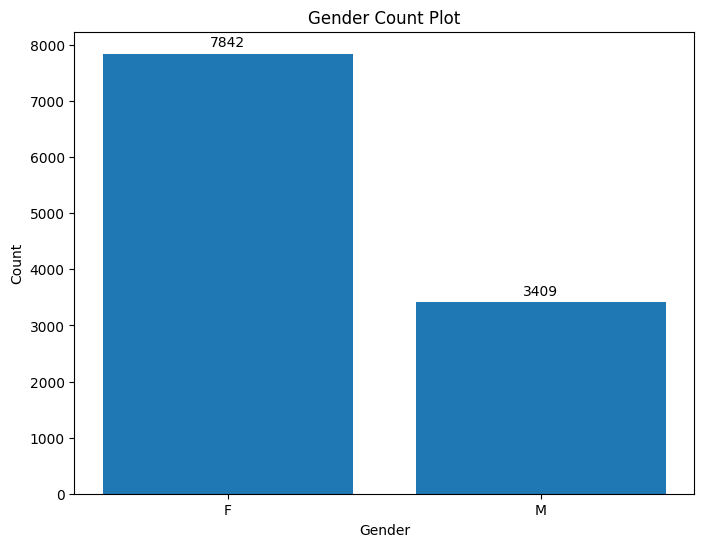

In [ ]:
#Exploratory Data Analysis
import pyspark.sql.functions as F
# Grouping by 'Gender' and count the occurrences
gender_counts = df.groupBy('Gender').count().orderBy('Gender')

# Converting the result to Pandas for plotting
gender_counts_df = gender_counts.toPandas()

# Creating the count plot using matplotlib
plt.figure(figsize=(8, 6))
ax = plt.bar(gender_counts_df['Gender'], gender_counts_df['count'])

# Adding labels to the bars
for bar in ax:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Count Plot')
plt.show()


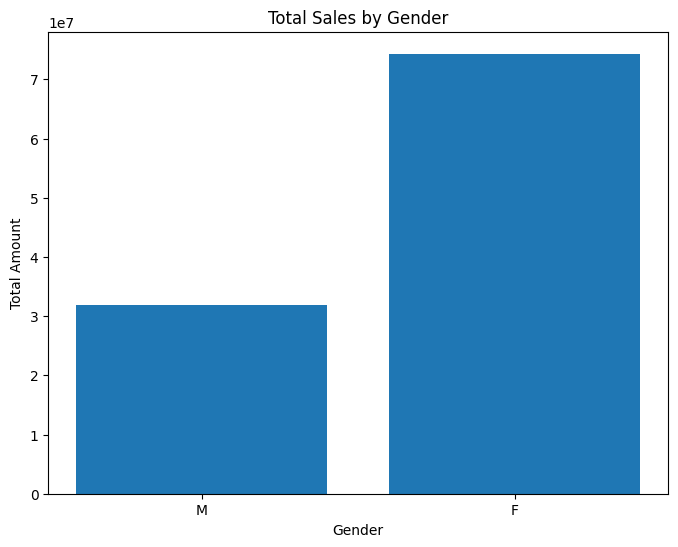

In [ ]:
# Grouping by 'Gender' and calculate the sum of 'Amount'
sales_gen = df.groupBy('Gender').agg(F.sum('Amount').alias('TotalAmount'))
# Sorting the DataFrame by 'TotalAmount' in ascending order
sales_gen = sales_gen.orderBy('TotalAmount', ascending=True)
# Converting the result to Pandas for plotting
sales_gen_df = sales_gen.toPandas()
plt.figure(figsize=(8, 6))
plt.bar(sales_gen_df['Gender'], sales_gen_df['TotalAmount'])

plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.title('Total Sales by Gender')
plt.show()


In [ ]:
# FROM ABOVE GRAPH WE CAN SEE THAT THE MOST OF THE BUYERS ARE FEMALES AND EVEN THE PURCHASING POWER OF FEMALES ARE GREATER THAN MEN

<Figure size 1000x600 with 0 Axes>

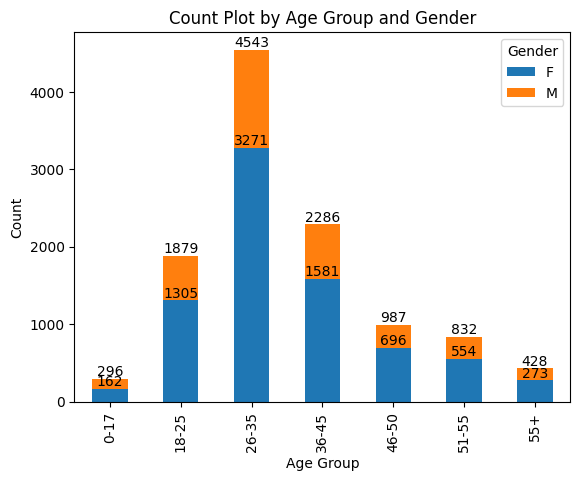

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("CountPlot").getOrCreate()
# Grouping by 'Age Group' and 'Gender' and count the occurrences
count_df = df.groupBy('Age Group', 'Gender').count()

# Converting the result to Pandas for plotting
count_pd = count_df.toPandas()

# Creating a pivot table for plotting
pivot_table = count_pd.pivot(index='Age Group', columns='Gender', values='count')
plt.figure(figsize=(10, 6))
ax = pivot_table.plot(kind='bar', stacked=True)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Count Plot by Age Group and Gender')
plt.legend(title='Gender')
plt.show()


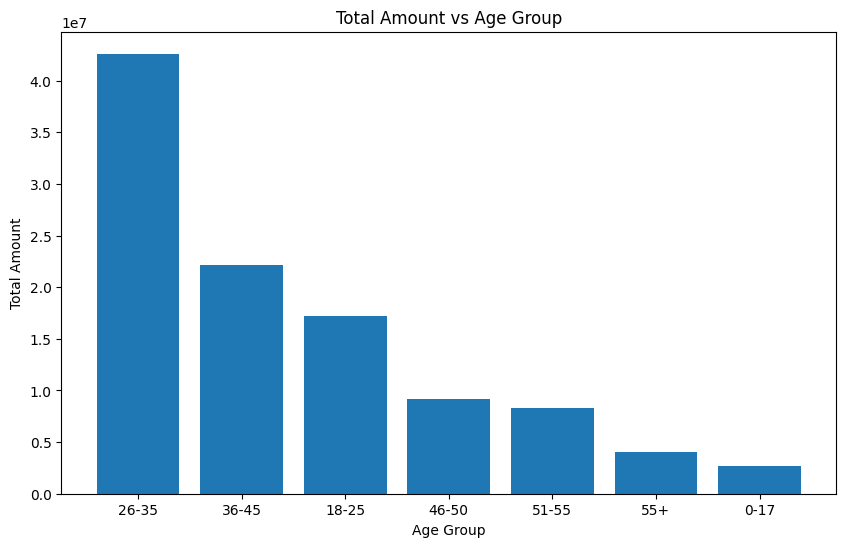

In [ ]:
# Grouping by 'Age Group' and calculate the sum of 'Amount'
sales_age = df.groupBy('Age Group').agg(F.sum('Amount').alias('TotalAmount'))

# Sortin theg DataFrame by 'TotalAmount' in descending order
sales_age = sales_age.orderBy('TotalAmount', ascending=False)

# Converting the result to Pandas for plotting
sales_age_df = sales_age.toPandas()
plt.figure(figsize=(10, 6))
plt.bar(sales_age_df['Age Group'], sales_age_df['TotalAmount'])
plt.xlabel('Age Group')
plt.ylabel('Total Amount')
plt.title('Total Amount vs Age Group')
plt.show()



In [ ]:
#FROM ABOVE GRAPHS WE CAN SEE THAT MOST OF THE BUYERS ARE AGE OF AGE GROUP BETWEEN 26-35 YRS FEMALE

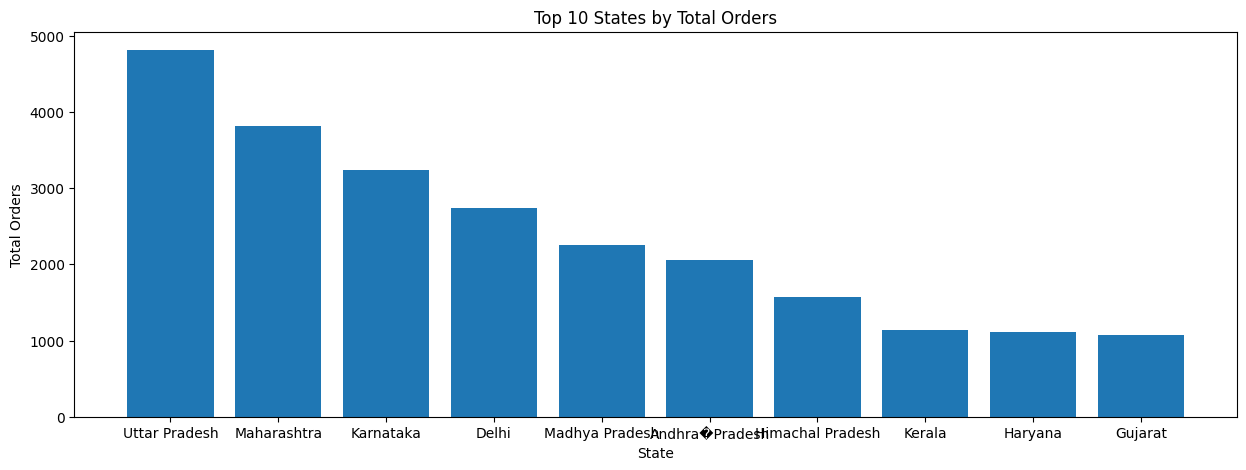

In [ ]:
#TOTAL NO OF ORDERS FROM TOP 10 STATES

# Grouping by 'State' and calculate the sum of 'Orders'
sales_state = df.groupBy('State').agg(F.sum('Orders').alias('TotalOrders'))
sales_state = sales_state.orderBy('TotalOrders', ascending=False).limit(10)
sales_state_df = sales_state.toPandas()
plt.figure(figsize=(15, 5))
plt.bar(sales_state_df['State'], sales_state_df['TotalOrders'])

plt.xlabel('State')
plt.ylabel('Total Orders')
plt.title('Top 10 States by Total Orders')
plt.show()


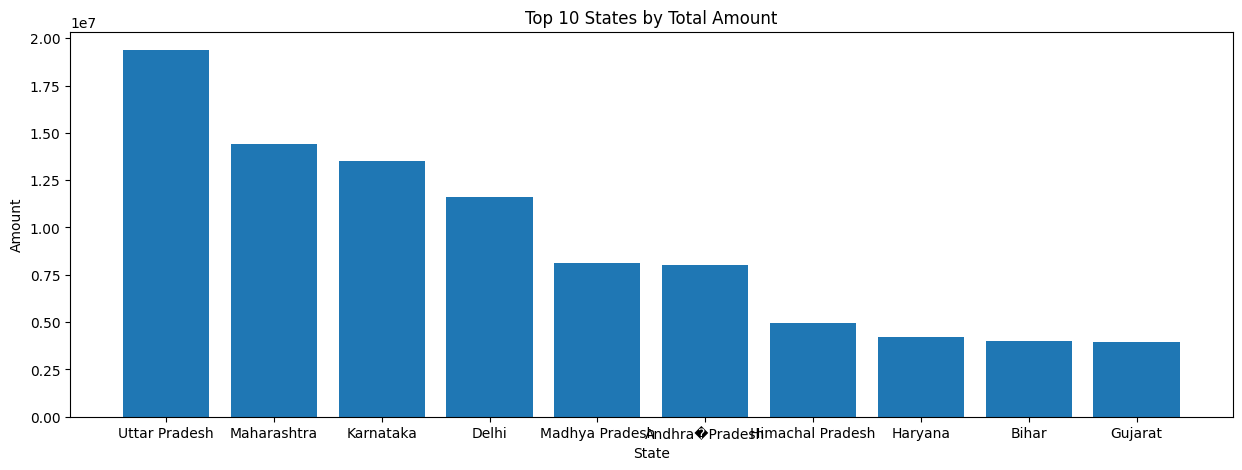

In [ ]:
#TOTAL NO OF Amounts FROM TOP 10 STATES

# Grouping by 'State' and calculate the sum of 'Amount'
sales_state = df.groupBy('State').agg(F.sum('Amount').alias('TotalAmount'))
sales_state = sales_state.orderBy('TotalAmount', ascending=False).limit(10)
sales_state_df = sales_state.toPandas()
plt.figure(figsize=(15, 5))
plt.bar(sales_state_df['State'], sales_state_df['TotalAmount'])

plt.xlabel('State')
plt.ylabel('Amount')
plt.title('Top 10 States by Total Amount')
plt.show()


In [ ]:
#FROM ABOVE GRAPHS WE CAN SEE THAT EXCPECTEDLY MOST OF THE ORDERS ARE FROM UTTAR PRADESH,MAHARASTRA AND KARNATKA RESPECTIVELY BUT
#TOTAL SALES/AMOUNT IN FROM UP,KARNATKA AND THEN MAHARASTRA

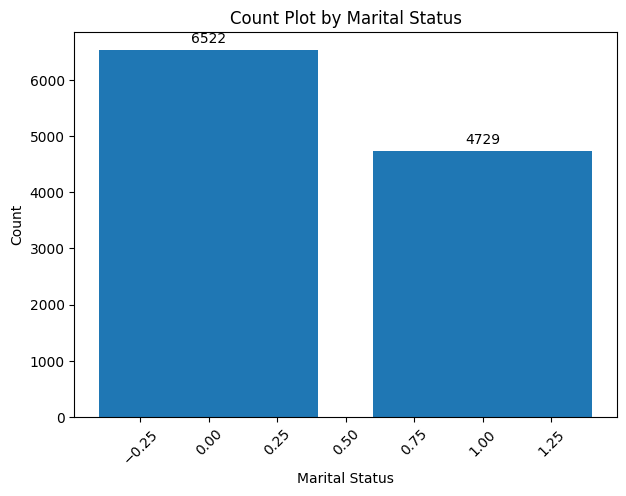

In [ ]:
# Grouping by 'Marital Status' and count the occurrences
marital_status_counts = df.groupBy('Shaadi').count().orderBy('count', ascending=False)

# Converting the result to Pandas for plotting
marital_status_counts_df = marital_status_counts.toPandas()
plt.figure(figsize=(7, 5))
ax = plt.bar(marital_status_counts_df['Shaadi'], marital_status_counts_df['count'])
for bar in ax:
    height = bar.get_height()
    plt.annotate(f'{int(height)}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Count Plot by Marital Status')
plt.xticks(rotation=45)
plt.show()


<Figure size 700x500 with 0 Axes>

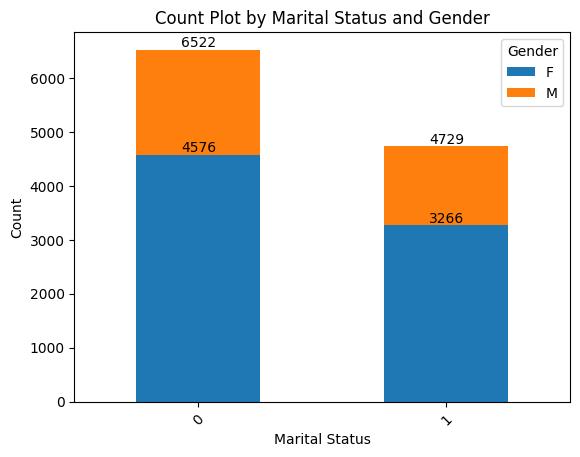

In [ ]:
# Grouping by 'Shaadi' and 'Gender' and count the occurrences
marital_gender_counts = df.groupBy('Shaadi', 'Gender').count()

# Converting the result to Pandas for plotting
marital_gender_counts_df = marital_gender_counts.toPandas()
pivot_table = marital_gender_counts_df.pivot(index='Shaadi', columns='Gender', values='count')
# Creating the count plot using matplotlib
plt.figure(figsize=(7, 5))
ax = pivot_table.plot(kind='bar', stacked=True)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Count Plot by Marital Status and Gender')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()


In [ ]:
# FROM ABOVE GRAPH WE CAN SEE THAT THE MOST OF THE BUYERS ARE MARRIED (WOMEN) AND THEY HAVE HIGH PURCHASING POWER